In [50]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [51]:
cancer = pd.read_csv("haberman.csv", header = None, names=['age', 'year_of_treatment', 'positive_lymph_nodes', 'survival_status_after_5_years'])

In [52]:
cancer.head()


,age,year_of_treatment,positive_lymph_nodes,survival_status_after_5_years
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [53]:
cancer.shape

(306, 4)

In [54]:
# Age: It represent the age of patient at which they undergone surgery (age from 30 to 83)
# Operation year: Year in which patient was undergone surgery(1958–1969)
# Survival Status: It represent whether patient survive more than 5 years or less after undergone through surgery.Here if patients survived 5 years or more is represented as 1 and patients who survived less than 5 years is represented as 2.
# Lymph Node: Lymph nodes are small, bean-shaped organs that act as filters along the lymph fluid channels. As lymph fluid leaves the breast and eventually goes back into the bloodstream, the lymph nodes try to catch and trap cancer cells before they reach other parts of the body. Having cancer cells in the lymph nodes under your arm suggests an increased risk of the cancer spreading.In our data it is axillary nodes detected(0–52)

In [55]:
cancer.columns

Index(['age', 'year_of_treatment', 'positive_lymph_nodes',
       'survival_status_after_5_years'],
      dtype='object')

In [56]:
print(cancer.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 4 columns):
age                              306 non-null int64
year_of_treatment                306 non-null int64
positive_lymph_nodes             306 non-null int64
survival_status_after_5_years    306 non-null int64
dtypes: int64(4)
memory usage: 9.6 KB
None


OBSERVATIONS:

* There are no missing values in this dataset.So there is no need to do data imputation.
* The datatype of 'survival_status_after_5_years' column is integer. It has to be converted to categorical datatype.
* The values of 'survival_status_after_5_years' are not meaningful. Hence they are mapped to 'yes' (survived after 5 years) and 'no' (not survived after 5 years).

In [57]:
#print the unique value of the data column
print(list(cancer['survival_status_after_5_years'].unique()))

[1, 2]


In [58]:
# modify the target column values to be meaningful as well as categorical
cancer['survival_status_after_5_years'] = cancer['survival_status_after_5_years'].map({1:"yes", 2:"no"})
cancer['survival_status_after_5_years'] = cancer['survival_status_after_5_years'].astype('category')
print(cancer.head())

   age  year_of_treatment  positive_lymph_nodes survival_status_after_5_years
0   30                 64                     1                           yes
1   30                 62                     3                           yes
2   30                 65                     0                           yes
3   31                 59                     2                           yes
4   31                 65                     4                           yes


In [59]:
cancer.columns

Index(['age', 'year_of_treatment', 'positive_lymph_nodes',
       'survival_status_after_5_years'],
      dtype='object')

In [60]:
cancer.size

1224

In [61]:
cancer["survival_status_after_5_years"].value_counts()

yes    225
no      81
Name: survival_status_after_5_years, dtype: int64

In [62]:
print(cancer.describe())

              age  year_of_treatment  positive_lymph_nodes
count  306.000000         306.000000            306.000000
mean    52.457516          62.852941              4.026144
std     10.803452           3.249405              7.189654
min     30.000000          58.000000              0.000000
25%     44.000000          60.000000              0.000000
50%     52.000000          63.000000              1.000000
75%     60.750000          65.750000              4.000000
max     83.000000          69.000000             52.000000


In [63]:
print("NUmber of rows:", cancer.shape[0])
print("Number of columns:", cancer.shape[1])
print("Columns : ", cancer.columns)

cancer["survival_status_after_5_years"].value_counts()
print("\n")
print("*"*50)
cancer["survival_status_after_5_years"].value_counts(normalize=True)

NUmber of rows: 306
Number of columns: 4
Columns :  Index(['age', 'year_of_treatment', 'positive_lymph_nodes',
       'survival_status_after_5_years'],
      dtype='object')


**************************************************


yes    0.735294
no     0.264706
Name: survival_status_after_5_years, dtype: float64

OBSERVATIONS:

* The age of the patients vary from 30 to 83 with median 52
* Although the maximum number of positive lymphs nodes observed is 52, nearly 75% of the patients have less than 5 positive lymphs nodes and nearly 25%
* The dataset contains a small number of records.
* The target column is imbalanced with 73% of values are "yes".


OBJECTIVE:

* To predict whether the patient will survive after 5 years or not based upon the patients age, year of treatment and the number of the positive lymphs.


In [64]:
list(cancer.columns)[:-1]

['age', 'year_of_treatment', 'positive_lymph_nodes']

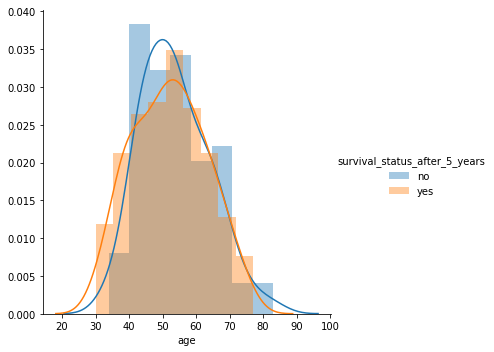

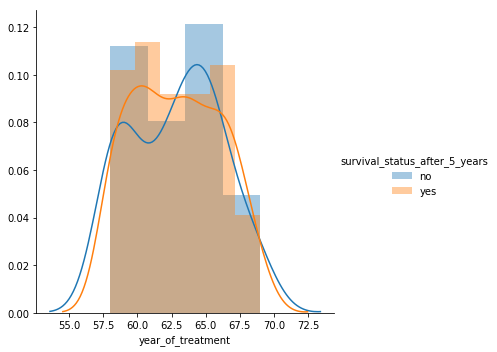

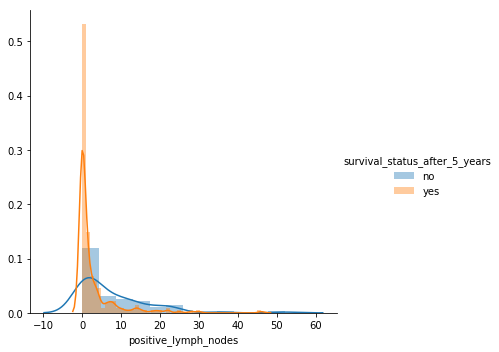

In [65]:
for index, feature in enumerate(list(cancer.columns)[:-1]):
    fg = sns.FacetGrid(cancer, hue = 'survival_status_after_5_years', height = 5)
    fg.map(sns.distplot, feature).add_legend()
    plt.show()


In [66]:
print(min(cancer.year_of_treatment), "<== minimum of year_of_treatment")
print(max(cancer.year_of_treatment), "<== maximum of year_of_treatment")
print(min(cancer.positive_lymph_nodes), "<== minimum of positive_lymph_nodes")
print(max(cancer.positive_lymph_nodes), "<== maximum of positive_lymph_node")
print(min(cancer.age), "<== minimum age")
print(max(cancer.age), "maximum age")

58 <== minimum of year_of_treatment
69 <== maximum of year_of_treatment
0 <== minimum of positive_lymph_nodes
52 <== maximum of positive_lymph_node
30 <== minimum age
83 maximum age


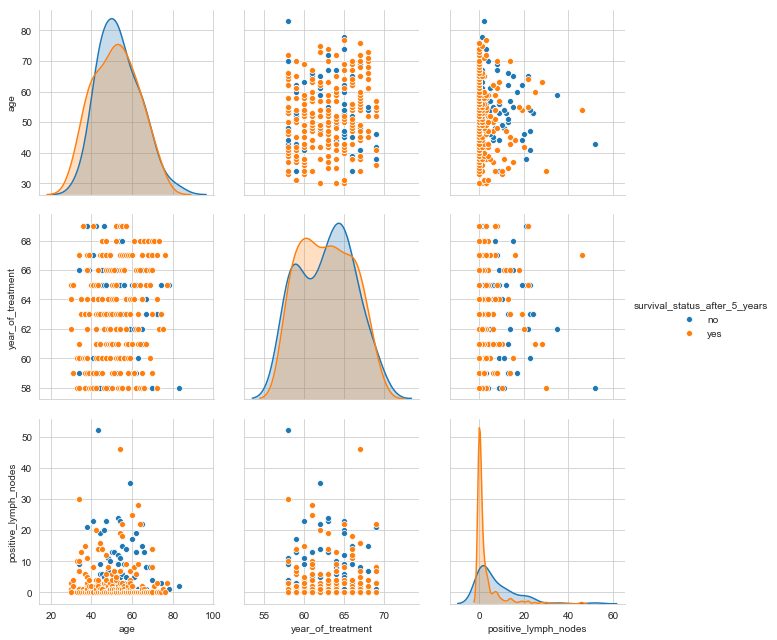

In [72]:
plt.close()
sns.set_style("whitegrid")
sns.pairplot(cancer, hue = "survival_status_after_5_years", height = 4)
plt.show()

In [73]:
help (plt.subplot)

Help on function subplot in module matplotlib.pyplot:

subplot(*args, **kwargs)
    Add a subplot to the current figure.
    
    Wrapper of `.Figure.add_subplot` with a difference in behavior
    explained in the notes section.
    
    Call signatures::
    
       subplot(nrows, ncols, index, **kwargs)
       subplot(pos, **kwargs)
       subplot(ax)
    
    Parameters
    ----------
    *args
        Either a 3-digit integer or three separate integers
        describing the position of the subplot. If the three
        integers are *nrows*, *ncols*, and *index* in order, the
        subplot will take the *index* position on a grid with *nrows*
        rows and *ncols* columns. *index* starts at 1 in the upper left
        corner and increases to the right.
    
        *pos* is a three digit integer, where the first digit is the
        number of rows, the second the number of columns, and the third
        the index of the subplot. i.e. fig.add_subplot(235) is the same as
       

************age***************
Bins edges: [30.  35.3 40.6 45.9 51.2 56.5 61.8 67.1 72.4 77.7 83. ]
PDF: [0.05228758 0.08823529 0.1503268  0.17320261 0.17973856 0.13398693
 0.13398693 0.05882353 0.02287582 0.00653595]
CDF: [0.05228758 0.14052288 0.29084967 0.46405229 0.64379085 0.77777778
 0.91176471 0.97058824 0.99346405 1.        ]


************year_of_treatment***************
Bins edges: [58.  59.1 60.2 61.3 62.4 63.5 64.6 65.7 66.8 67.9 69. ]
PDF: [0.20588235 0.09150327 0.08496732 0.0751634  0.09803922 0.10130719
 0.09150327 0.09150327 0.08169935 0.07843137]
CDF: [0.20588235 0.29738562 0.38235294 0.45751634 0.55555556 0.65686275
 0.74836601 0.83986928 0.92156863 1.        ]


************positive_lymph_nodes***************
Bins edges: [ 0.   5.2 10.4 15.6 20.8 26.  31.2 36.4 41.6 46.8 52. ]
PDF: [0.77124183 0.09803922 0.05882353 0.02614379 0.02941176 0.00653595
 0.00326797 0.         0.00326797 0.00326797]
CDF: [0.77124183 0.86928105 0.92810458 0.95424837 0.98366013 0.99019608
 0.

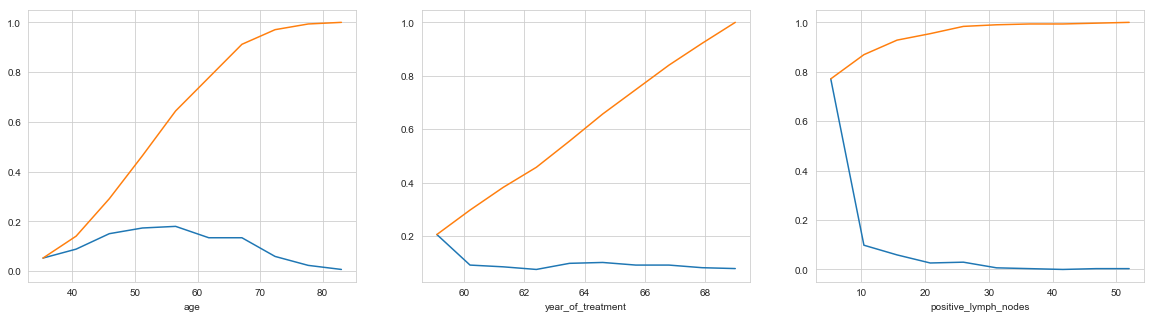

In [82]:
plt.figure(figsize=(20,5))
for idx, feature in enumerate(list(cancer.columns[:-1])):
    plt.subplot(1, 3, idx+1)
    print("************" + feature +"***************")
    counts, bin_edges = np.histogram(cancer[feature], bins = 10, density = True)
    print("Bins edges: {}".format(bin_edges))
    pdf = counts/sum(counts)
    print("PDF: {}".format(pdf))
    cdf = np.cumsum(pdf)
    print("CDF: {}".format(cdf))
    plt.plot(bin_edges[1:], pdf, bin_edges[1:], cdf)
    plt.xlabel(feature)
    print("\n")

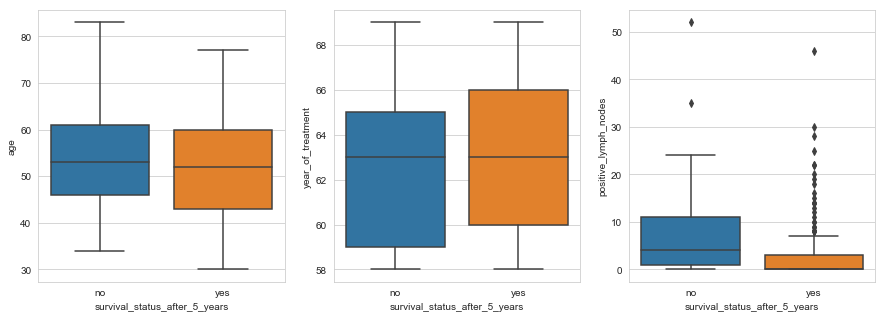

In [89]:
fig, axes = plt.subplots(1, 3, figsize=(15,5))
for idx, feature in enumerate(list(cancer.columns[:-1])):
    sns.boxplot(x = "survival_status_after_5_years", y = feature, data = cancer, ax = axes[idx])
plt.show()
    

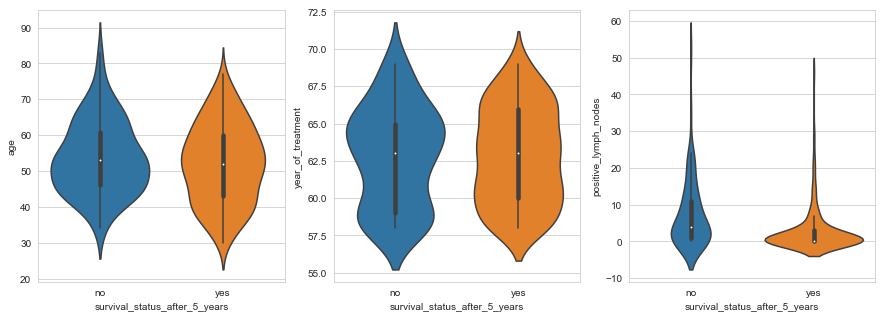

In [90]:
# violin plots

fig, axes = plt.subplots(1, 3, figsize=(15, 5))
for idx, feature in enumerate(list(cancer.columns[:-1])):
    sns.violinplot(x = 'survival_status_after_5_years', y = feature, data = cancer, ax = axes[idx])
plt.show()

OBSERVATIONS:

* The number of positive lymph nodes of the survivors is highly densed from 0 to 5. (PDF-CDF graph)
* Almost 80% of the patients have less than or equal to 5 positive lymphs nodea. (box plot)
* The patients are treated after 1966 have the slightly higher chance to survive the rest. The patients treated before 1959 have the slightly lower chance to survive the rest.(last two graphs)
